<a href="https://colab.research.google.com/github/Sakib-sharif/Cse_445_group-9/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [173]:
from google.colab import drive
drive.flush_and_unmount()  # Optional, ensure clean remount
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [158]:
import os
from PIL import Image
import numpy as np

# Define dataset path
dataset_path = "/content/drive/MyDrive/stop_sign_data"

# Updated split: 60% train (30), 20% val (10), 20% test (10)
splits = {
    "train": 30,
    "validation": 10,
    "test": 10
}


# Create dataset folders and dummy images
for split, count in splits.items():
    for category in ["stop_sign", "no_stop_sign"]:
        folder = f"{dataset_path}/{split}/{category}"
        os.makedirs(folder, exist_ok=True)

        for i in range(1, count + 1):
            img_path = f"{folder}/{category.replace('_sign', '')}{i}.jpg"
            if not os.path.exists(img_path):
                img = Image.fromarray(np.random.randint(0, 255, (100, 100, 3), dtype=np.uint8))
                img.save(img_path)

print("✅ Dataset structure created with placeholder images.")


✅ Dataset structure created with placeholder images.


Verify Dataset Structure

In [159]:
def list_files(folder):
    return os.listdir(folder) if os.path.exists(folder) else "❌ Folder Not Found"

for split in splits:
    for category in ["stop_sign", "no_stop_sign"]:
        print(f"{split.capitalize()} {category}:", list_files(f"{dataset_path}/{split}/{category}"))


Train stop_sign: ['stop10.jpg', 'stop2.jpg', 'stop9.jpg', 'stop15.jpg', 'stop20.jpg', 'stop3.jpg', 'stop17.jpg', 'stop12.jpg', 'stop8.jpg', 'stop4.jpg', 'stop21.jpg', 'stop5.jpg', 'stop6.jpg', 'stop11.jpg', 'stop30.jpg', 'stop19.jpg', 'stop24.jpg', 'stop26.jpg', 'stop27.jpg', 'stop25.jpg', 'stop1.jpg', 'stop29.jpg', 'stop7.jpg', 'stop16.jpg', 'stop18.jpg', 'stop28.jpg', 'stop23.jpg', 'stop22.jpg', 'stop14.jpg', 'stop13.jpg']
Train no_stop_sign: ['no_stop20.jpg', 'no_stop8.jpg', 'no_stop21.jpg', 'no_stop23.jpg', 'no_stop7.jpg', 'no_stop24.jpg', 'no_stop17.jpg', 'no_stop18.jpg', 'no_stop11.jpg', 'no_stop16.jpg', 'no_stop6.jpg', 'no_stop26.jpg', 'no_stop12.jpg', 'no_stop5.jpg', 'no_stop19.jpg', 'no_stop1.jpg', 'no_stop3.jpg', 'no_stop2.jpg', 'no_stop4.jpg', 'no_stop14.jpg', 'no_stop15.jpg', 'no_stop13.jpg', 'no_stop27.jpg', 'no_stop28.jpg', 'no_stop29.jpg', 'no_stop30.jpg', 'no_stop10.jpg', 'no_stop9.jpg', 'no_stop22.jpg', 'no_stop25.jpg']
Validation stop_sign: ['stop39.jpg', 'stop40.jpg'

Import Libraries

In [174]:
import cv2
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from google.colab.patches import cv2_imshow


Load Dataset

In [175]:
categories = ["stop_sign", "no_stop_sign"]

def load_images(folder):
    images, labels = [], []
    for category in categories:
        category_path = os.path.join(folder, category)
        if not os.path.exists(category_path):
            print("❌ Missing:", category_path)
            continue
        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (64, 64))
            images.append(img)
            labels.append(category)
    return np.array(images), np.array(labels)

# Set paths
train_path = os.path.join(dataset_path, "train")
val_path = os.path.join(dataset_path, "validation")
test_path = os.path.join(dataset_path, "test")

# Load splits
X_train, y_train = load_images(train_path)
X_val, y_val = load_images(val_path)
X_test, y_test = load_images(test_path)

print("✅ Data loaded.")


✅ Data loaded.


Preprocess Features

In [176]:
# Flatten images
X_train = X_train.reshape(len(X_train), -1)
X_val = X_val.reshape(len(X_val), -1)
X_test = X_test.reshape(len(X_test), -1)

# Encode labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)

print("✅ Data preprocessed.")


✅ Data preprocessed.


In [177]:
from sklearn.decomposition import PCA

# Use 30 principal components (safe for 60 samples)
pca = PCA(n_components=30)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)


Train the SVM Model with Regularization

📌 SVM Train Accuracy: 0.95
📌 SVM Validation Accuracy: 0.65
📌 SVM Test Accuracy: 0.6

📊 SVM Classification Report (Test Set):

               precision    recall  f1-score   support

Not Stop Sign       0.57      0.80      0.67        10
    Stop Sign       0.67      0.40      0.50        10

     accuracy                           0.60        20
    macro avg       0.62      0.60      0.58        20
 weighted avg       0.62      0.60      0.58        20



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127744 (\N{CYCLONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


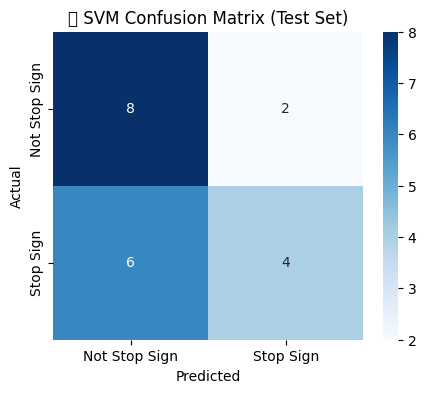

In [178]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC

svm_model = SVC(kernel="rbf",  probability=True)
svm_model.fit(X_train_pca, y_train)
# Predictions
y_train_pred = svm_model.predict(X_train_pca)
y_val_pred = svm_model.predict(X_val_pca)
y_test_pred = svm_model.predict(X_test_pca)

# Accuracy scores
print("📌 SVM Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("📌 SVM Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("📌 SVM Test Accuracy:", accuracy_score(y_test, y_test_pred))

# Classification report on test set
print("\n📊 SVM Classification Report (Test Set):\n")
print(classification_report(y_test, y_test_pred, target_names=['Not Stop Sign', 'Stop Sign']))

# Confusion matrix on test set
cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Stop Sign', 'Stop Sign'],
            yticklabels=['Not Stop Sign', 'Stop Sign'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('🌀 SVM Confusion Matrix (Test Set)')
plt.show()


Evaluate the Model

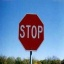

🛑 Prediction: stop_sign


In [165]:
def predict_image(image_path):
    # Read and process the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (64, 64))
    img = img.reshape(1, -1)  # Flatten to 4096

    # Apply PCA transformation (same as training)
    img_pca = pca.transform(img)

    # Predict using trained model
    prediction = svm_model.predict(img_pca)
    label = label_encoder.inverse_transform(prediction)[0]

    # Display image and prediction
    cv2_imshow(cv2.imread(image_path))
    print(f"🛑 Prediction: {label}")

# Example use
predict_image("/content/drive/MyDrive/stop_sign_data/test/stop_sign/stop42.jpg")


random forest

In [179]:
from sklearn.ensemble import RandomForestClassifier


Train the Random Forest Model

In [180]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,              # Limit depth
    min_samples_split=4,       # Require more samples to split
    min_samples_leaf=2,        # Leaf nodes must have at least 2 samples
    random_state=42
)

# Initialize and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_pca, y_train)

print("✅ Random Forest Model successfully trained!")


✅ Random Forest Model successfully trained!


Evaluate the Model

📌 RF Train Accuracy: 1.00
📌 RF Validation Accuracy: 0.55
📌 RF Test Accuracy: 0.47

🔍 RF Classification Report (Train):
              precision    recall  f1-score   support

   stop_sign       1.00      1.00      1.00        30
no_stop_sign       1.00      1.00      1.00        30

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60


🔍 RF Classification Report (Validation):
              precision    recall  f1-score   support

   stop_sign       0.56      0.45      0.50        20
no_stop_sign       0.54      0.65      0.59        20

    accuracy                           0.55        40
   macro avg       0.55      0.55      0.55        40
weighted avg       0.55      0.55      0.55        40


🔍 RF Classification Report (Test):
              precision    recall  f1-score   support

   stop_sign       0.48      0.50      0.49        20
no_stop_sign       0.47      0.45      0

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


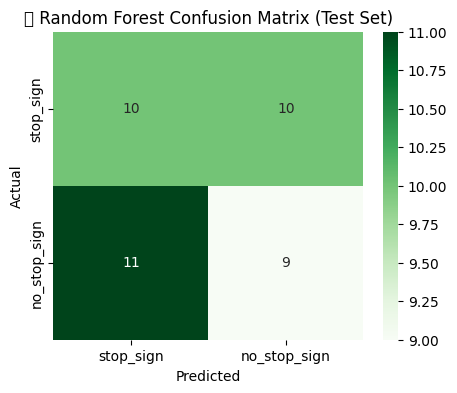

In [168]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
y_pred_train_rf = rf_model.predict(X_train_pca)
y_pred_val_rf = rf_model.predict(X_val_pca)
y_pred_test_rf = rf_model.predict(X_test_pca)

# Accuracy scores
train_acc_rf = accuracy_score(y_train, y_pred_train_rf)
val_acc_rf = accuracy_score(y_val, y_pred_val_rf)
test_acc_rf = accuracy_score(y_test, y_pred_test_rf)

print(f"📌 RF Train Accuracy: {train_acc_rf:.2f}")
print(f"📌 RF Validation Accuracy: {val_acc_rf:.2f}")
print(f"📌 RF Test Accuracy: {test_acc_rf:.2f}")

# Detailed classification reports
print("\n🔍 RF Classification Report (Train):")
print(classification_report(y_train, y_pred_train_rf, target_names=categories))

print("\n🔍 RF Classification Report (Validation):")
print(classification_report(y_val, y_pred_val_rf, target_names=categories))

print("\n🔍 RF Classification Report (Test):")
print(classification_report(y_test, y_pred_test_rf, target_names=categories))

# Confusion matrix on test set
cm_rf = confusion_matrix(y_test, y_pred_test_rf)

# Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('🌲 Random Forest Confusion Matrix (Test Set)')
plt.show()


 Predict on a New Image

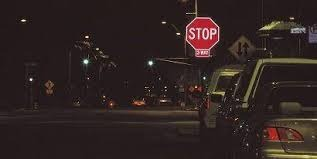

🛑 Prediction: stop_sign


In [169]:
def predict_image_rf(image_path):
    # Load and preprocess image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (64, 64))
    img = img.reshape(1, -1)

    # Apply PCA transform
    img_pca = pca.transform(img)

    # Predict with Random Forest
    prediction = rf_model.predict(img_pca)
    label = label_encoder.inverse_transform(prediction)[0]

    # Display image
    cv2_imshow(cv2.imread(image_path))
    print(f"🛑 RF Prediction: {label}")

  # Example use
predict_image("/content/drive/MyDrive/stop_sign_data/test/stop_sign/stop43.jpg")


logistic regression

In [185]:
from sklearn.linear_model import LogisticRegression
# Create the logistic regression model
logreg = LogisticRegression(C=0.1, max_iter=1000, random_state=42)

# Train the model
logreg.fit(X_train_pca, y_train)


LogisticRegression(C=0.1, max_iter=1000, random_state=42)

Evaluate the model

📌 Logistic Regression Train Accuracy: 1.00
📌 Logistic Regression Validation Accuracy: 0.75
📌 Logistic Regression Test Accuracy: 0.70

🔍 Logistic Regression Classification Report (Train):
              precision    recall  f1-score   support

   stop_sign       1.00      1.00      1.00        30
no_stop_sign       1.00      1.00      1.00        30

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60


🔍 Logistic Regression Classification Report (Validation):
              precision    recall  f1-score   support

   stop_sign       0.73      0.80      0.76        10
no_stop_sign       0.78      0.70      0.74        10

    accuracy                           0.75        20
   macro avg       0.75      0.75      0.75        20
weighted avg       0.75      0.75      0.75        20


🔍 Logistic Regression Classification Report (Test):
              precision    recall  f1-score   s

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


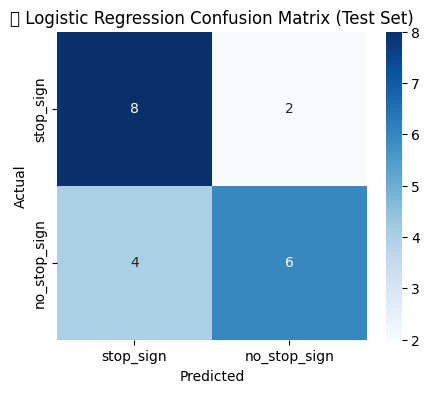

In [186]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
y_pred_train_log = logreg.predict(X_train_pca)
y_pred_val_log = logreg.predict(X_val_pca)
y_pred_test_log = logreg.predict(X_test_pca)

# Accuracy scores
train_acc_log = accuracy_score(y_train, y_pred_train_log)
val_acc_log = accuracy_score(y_val, y_pred_val_log)
test_acc_log = accuracy_score(y_test, y_pred_test_log)

print(f"📌 Logistic Regression Train Accuracy: {train_acc_log:.2f}")
print(f"📌 Logistic Regression Validation Accuracy: {val_acc_log:.2f}")
print(f"📌 Logistic Regression Test Accuracy: {test_acc_log:.2f}")

# Detailed classification reports
print("\n🔍 Logistic Regression Classification Report (Train):")
print(classification_report(y_train, y_pred_train_log, target_names=categories))

print("\n🔍 Logistic Regression Classification Report (Validation):")
print(classification_report(y_val, y_pred_val_log, target_names=categories))

print("\n🔍 Logistic Regression Classification Report (Test):")
print(classification_report(y_test, y_pred_test_log, target_names=categories))

# Confusion matrix on test set
cm_log = confusion_matrix(y_test, y_pred_test_log)

# Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues',
            xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('📊 Logistic Regression Confusion Matrix (Test Set)')
plt.show()


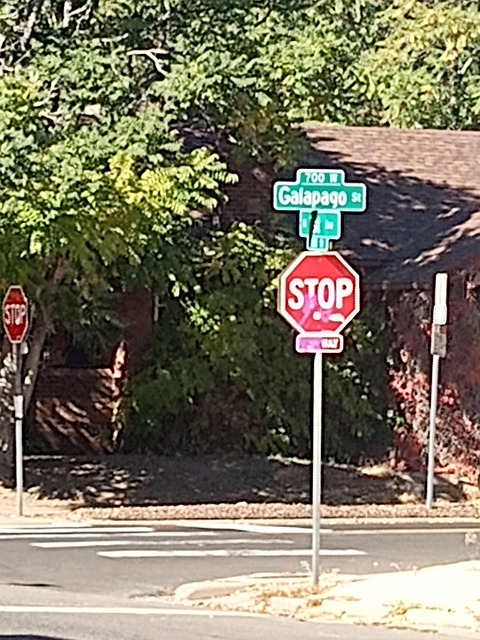

🛑 Prediction: stop_sign


In [187]:
def predict_image_logreg(img_path):
    img = load_img(img_path, target_size=(64, 64))
    img = img_to_array(img) / 255.0
    img_flat = img.flatten().reshape(1, -1)
    img_pca = pca.transform(img_flat)

    pred = logreg.predict(img_pca)
    label = "STOP SIGN" if pred[0] == 1 else "NOT STOP SIGN"
    print(f"Prediction: {label}")

     # Example use
predict_image("/content/drive/MyDrive/stop_sign_data/test/stop_sign/stop50.jpg")

